1. Read File

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uplaoded = files.upload()


Saving co2.csv to co2 (1).csv


In [3]:
df = pd.read_csv("co2.csv")
df.head()

,Year,Month,Decimal Date,Carbon_Dioxide,Seasonally_Adjusted_CO2,Carbon_Dioxide_Fit
0,1958.0,3.0,1958/2027,315.69,314.42,316.18
1,1958.0,4.0,1958/2877,317.45,315.15,317.30
2,1958.0,5.0,1958/3699,317.50,314.73,317.83
3,1958.0,6.0,1958/4548,NaN,NaN,317.22
4,1958.0,7.0,1958/537,315.86,315.17,315.87


Number of rows and columns​

In [4]:
print(df.shape)
print("Number of columns is: ",len(df.columns))
print("Number of rows is: ",len(df))

(720, 6)
Number of columns is:  6
Number of rows is:  720


Number of dimensions​

In [5]:
df.ndim

2

Statistics​

In [6]:
df.describe(include='all')


,Year,Month,Decimal Date,Carbon_Dioxide,Seasonally_Adjusted_CO2,Carbon_Dioxide_Fit
count,715.000000,715.000000,715,703.000000,703.000000,704.000000
unique,NaN,NaN,715,NaN,NaN,NaN
top,NaN,NaN,1983/789,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN
mean,1987.681119,6.528671,NaN,352.375633,352.375206,352.187017
std,17.252422,3.448331,NaN,26.241884,26.171620,26.217890
min,1958.000000,1.000000,NaN,313.210000,314.420000,312.450000
25%,1973.000000,4.000000,NaN,328.555000,329.010000,328.447500
50%,1988.000000,7.000000,NaN,349.800000,349.820000,349.750000
75%,2003.000000,10.000000,NaN,373.195000,372.935000,372.995000


Find Missing Value​

In [7]:
df.isna()

,Year,Month,Decimal Date,Carbon_Dioxide,Seasonally_Adjusted_CO2,Carbon_Dioxide_Fit
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,True,True,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
715,False,False,False,True,True,True
716,False,False,False,True,True,True
717,False,False,False,True,True,True
718,False,False,False,True,True,True


Rename column​

In [8]:
df=df.rename(columns={'Carbon_Dioxide':'Co2'})

Find missing value​(replace missing with median)

In [9]:
 df=df.fillna(df.mean())
 df.isna()

,Year,Month,Decimal Date,Co2,Seasonally_Adjusted_CO2,Carbon_Dioxide_Fit
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
715,False,False,False,False,False,False
716,False,False,False,False,False,False
717,False,False,False,False,False,False
718,False,False,False,False,False,False


Plot all the graphs​

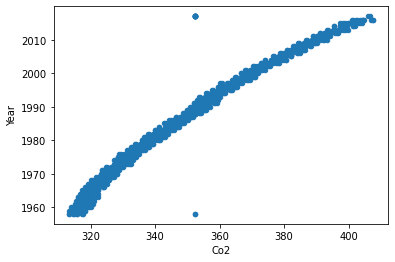

In [10]:
df.plot(x='Co2',y='Year',kind='scatter')

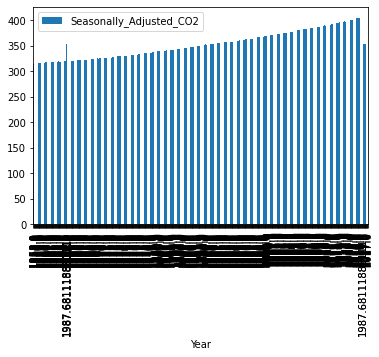

In [11]:
df.plot(x='Year',y='Seasonally_Adjusted_CO2',kind='bar')


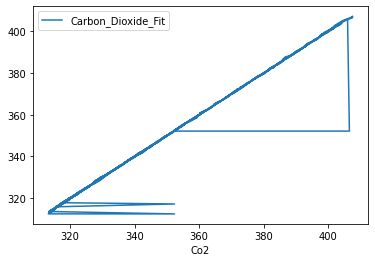

In [12]:
 df.plot(x='Co2',y='Carbon_Dioxide_Fit')


SIMPLE LINEAR REGRESSION


In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [14]:
x = df['Co2']
y = df['Year']

In [15]:
model = LinearRegression()

In [16]:
model.fit(x.values.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
r_sq = model.score(x.values.reshape(-1, 1), y)
print("co-eff of determination: ",r_sq)

co-eff of determination:  0.9310139600789393


In [18]:
print("intercept: ",model.intercept_)

intercept:  1762.2470304486162


In [19]:
print("Slope: ",model.coef_)

Slope:  [0.63975504]


In [20]:
y_pred = model.predict(x.values.reshape(-1, 1))
print('predicated response: ',y_pred, sep='\n')

predicated response: 
[1964.21130014 1965.33726902 1965.36925677 1987.68111888 1964.3200585
 1963.72508631 1962.62470764 1987.68111888 1962.70147824 1963.55875
 1964.14092709 1964.71670663 1964.82546498 1965.51000288 1965.87466326
 1965.78509755 1964.75509193 1963.64191815 1963.02775331 1962.70787579
 1963.6483157  1964.14092709 1964.68471888 1965.0301866  1965.42043718
 1966.34808199 1966.98783703 1966.70634481 1965.8042902  1964.3456487
 1963.23887248 1963.02135576 1963.76986916 1964.53117766 1964.98540375
 1965.49720778 1966.03460202 1966.63597176 1967.33970231 1966.82150072
 1966.05379467 1964.91503069 1963.76347161 1963.96819323 1964.47359971
 1965.0557768  1965.65074899 1966.04099957 1966.76392277 1967.33330476
 1967.61479697 1967.36529251 1966.71913991 1965.30528127 1964.56956297
 1964.03856628 1964.85105519 1965.49720778 1966.16255303 1966.37367219
 1966.87907867 1967.85790389 1968.40809323 1967.91548185 1966.80230807
 1965.54199063 1964.54397277 1964.40322666 1965.08776455 196

MULTIPLE LINEAR REGRESSION

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
a = df[['Year','Co2']]
b = df['Carbon_Dioxide_Fit']
a,b = np.array(a),np.array(b)

In [22]:
model2 =LinearRegression().fit(a,b)

In [23]:
r_sq2 = model2.score(a,b)
print("Coeff of determination",r_sq)

Coeff of determination 0.9310139600789393


In [24]:
print("intercept: ",model2.intercept_)
print("slope: ",model2.coef_)

intercept:  -299.4258190013046
slope:  [0.17104801 0.88435156]


In [25]:
b_pred = model.predict(b.reshape(-1,1))
print("predicted response: ", y_pred,sep="\n")

predicted response: 
[1964.21130014 1965.33726902 1965.36925677 1987.68111888 1964.3200585
 1963.72508631 1962.62470764 1987.68111888 1962.70147824 1963.55875
 1964.14092709 1964.71670663 1964.82546498 1965.51000288 1965.87466326
 1965.78509755 1964.75509193 1963.64191815 1963.02775331 1962.70787579
 1963.6483157  1964.14092709 1964.68471888 1965.0301866  1965.42043718
 1966.34808199 1966.98783703 1966.70634481 1965.8042902  1964.3456487
 1963.23887248 1963.02135576 1963.76986916 1964.53117766 1964.98540375
 1965.49720778 1966.03460202 1966.63597176 1967.33970231 1966.82150072
 1966.05379467 1964.91503069 1963.76347161 1963.96819323 1964.47359971
 1965.0557768  1965.65074899 1966.04099957 1966.76392277 1967.33330476
 1967.61479697 1967.36529251 1966.71913991 1965.30528127 1964.56956297
 1964.03856628 1964.85105519 1965.49720778 1966.16255303 1966.37367219
 1966.87907867 1967.85790389 1968.40809323 1967.91548185 1966.80230807
 1965.54199063 1964.54397277 1964.40322666 1965.08776455 1965